In [0]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn import cluster, datasets
import seaborn as sns
import json
import sys
import codecs
import os
from collections import defaultdict, Counter

In [0]:
def show_histogram(d):
    plt.figure(figsize=(16,8))
    c = {k: len(d[k]) for k in d.keys()}
    bars, heights = zip(*c.items())
    y_pos = range(len(bars))
    plt.bar(y_pos, heights)
    plt.xticks(y_pos, bars, rotation=90)
    plt.show()

In [0]:
embedDir = "./MegaSentEmbs/"
dumpdir = "./dump/"
oldlist = os.listdir(embedDir)
filelist = sorted([embedDir+f for f in oldlist if f[-3:]=="pkl"])
# filenum = len(filelist)
filenum = 5
# print(filelist)
smalllist = filelist[:filenum]
print("smalllist: ", smalllist)

smalllist:  ['./MegaSentEmbs/repository_embedding_100_2013-03-18.pkl', './MegaSentEmbs/repository_embedding_101_2013-03-18.pkl', './MegaSentEmbs/repository_embedding_102_2013-03-18.pkl', './MegaSentEmbs/repository_embedding_103_2013-03-18.pkl', './MegaSentEmbs/repository_embedding_104_2013-03-18.pkl']


#Read all the pandas dataframes

In [0]:
megadf = pd.DataFrame()
for f in smalllist:
    tempdf = pd.read_pickle(f)
    # print(tempdf.shape)
    megadf = megadf.append(tempdf, ignore_index = True)

print(megadf.shape)
print(megadf.tail())

(2433, 4)
           id                                              title  \
2428  9549863                         In Search of the Argonauts   
2429  9549864       When Is A National Team Not A National Team?   
2430  9549866                   Football and the Cyprus conflict   
2431  9549873  Optimisation of Mobile Communication Networks ...   
2432  9549874                        Free Search of Global Value   

                                               abstract  \
2428  [paper, examines, concerted, attempt, group, s...   
2429  [essay, analyzes, anomaly, recognition, place,...   
2430  [essay, look, football, role, cyprus, conflict...   
2431  [mini, conference, optimisation, mobile, commu...   
2432  [article, present, novel, investigation, two, ...   

                                              embedding  
2428  [-0.20942938586860307, 0.40039306438355393, -0...  
2429  [-0.1677260275156407, 0.26426473158190433, -0....  
2430  [-0.15642487500000005, 0.19240105999999996, -0

In [0]:
predata = megadf["embedding"]

data = np.matrix(predata.to_list())
print(data.shape)


(2433, 250)


#Number of Clusters

In [0]:
k = 50

In [0]:
print("Starting Clustering Process")
model = cluster.AgglomerativeClustering(n_clusters=k, affinity='euclidean', linkage='ward')
model.fit(data)
print("Agglomerative.fit(data) Done!")

Starting Clustering Process
k_means.fit(data) Done!


In [0]:
print("hello")

hello


In [0]:
centroids = model.cluster_centers_
labels = model.labels_
megadf["clusterlabel"]=labels

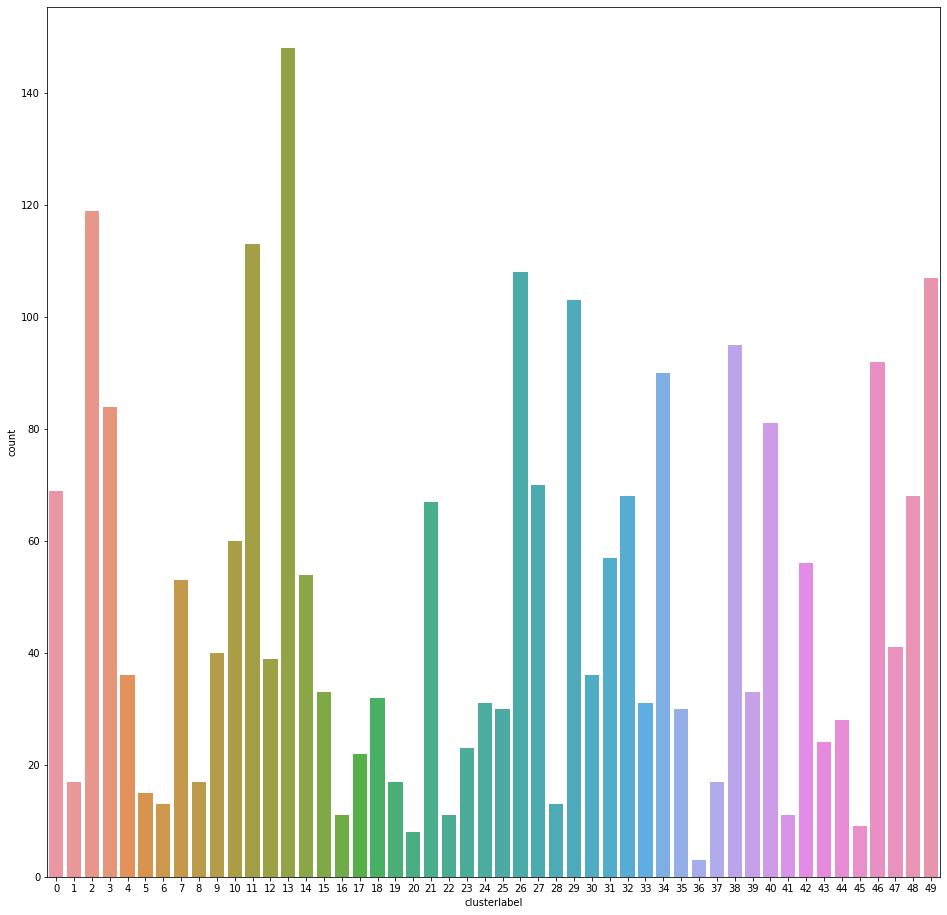

In [0]:
plt.figure(figsize=(16,16))
sns.countplot("clusterlabel", data=megadf)

In [0]:
import dtale
s = megadf[megadf["clusterlabel"] == 48].loc[:, ["title", "abstract"]]
# megadf.columns
dtale.show(s)
# s

Executing shutdown due to inactivity...
Executing shutdown due to inactivity...


2020-02-27 16:41:56,080 - INFO     - Executing shutdown due to inactivity...


Executing shutdown...
Executing shutdown...


2020-02-27 16:41:56,159 - INFO     - Executing shutdown...
